# Data Wrangling Project.

## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# we want to see all the columns in pandas:
pd.set_option('display.max_columns', None)

In [2]:
twitter_archive= pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### here we downloaded the file programmatically and save it in a csv file.
#### we put the code in a note so we shouldn't download the file every time. but if you want to download it again, just remove the note.


In [3]:
# url_image_predictions = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# image_predictions = requests.get(url_image_predictions).content.decode('utf-8')\
# .replace('\t',',')
# with open("image_predictions.csv","w") as f:
#     f.write(image_predictions)

In [4]:
  
image_predictions = pd.read_csv("image_predictions.csv")
image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### we download here the twits from twitter. we put the code in a note , if you want to download again you need to remove the note and add the auth credentials.

In [5]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'hidden'
# consumer_secret = 'hidden'
# access_token = 'hidden'
# access_secret = 'hidden'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
df_json = pd.read_json("tweet-json.txt", lines=True)
df_json.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assess

In [7]:
df_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [8]:
df_json.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [9]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### df_json assessment: 
#### tidiness
* we don't need all the data, just the favorites and the re-twits.
* we will unite this table with the archive table.


In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
twitter_archive.duplicated(["tweet_id"]).sum()

0


### twitter_archive assessment 
#### quality:
* Erroneous datatypes (timestamp)
* in the text column, sometimes there isn't a text, just link, sometimes there is spoiled link like id 878404777348136000 or 873337748698140000 or 863471782782697000
* in some columns there are 0 values in favorite_count and thousands in retweet_count, it's not logical!
* the normal rating_numerator  is like 10-20 , but there are nominators of hundreds ...and the max value in thousands. that outliers could damage our analysis.
* seems like we haven't all the urls - there are "2295 non null" from 2354 rows.
* the mean value of the rating_denominator isn't 10 which means that there are denominator different from 10.
* There is a None value as a string in some columns and not NaN

#### tidiness
* we don't need all the columns to our analysis.
* The three datasets could be merged together in one.
* i was prefer all the "doggo,floofer,pupper,puppo" in one column, so i could do value counts easily.


In [14]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions.duplicated("tweet_id").sum()

0

In [17]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


### image_predictions assessment 
#### quality:
* seems that there are images which are not dogs at all ! i saw a turtle and elephant.
* seems like the system sometimes recognizes the dog just in third probability like in this url :
https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg 
there is a dog in a shopping cart. the system recognize it as a "shopping cart" and shoping basket in p1 and p2.


### assesment conclusion:
* there are many problems in that dataset, so we should confine what we want to investigate. we don't need to fix all , we would fix only what needed for our investigation.
* for our poprpuse we don't need the text and the url columns. so we would'nt fix the problems there and we will remove this columns.
* so in the "archive" data we would fix the rating_numerator, rating_denominator,retweet_count, favorite_count, and the "doggo,floofer,pupper,puppo" columns.
* in the "image predictions" dataset: if the sysytem didn't recognize a dog at all, we will remove this row. if there was a recognize, we would take the one with the highest probability.
* after this we would do a inner join to the archive dataset, so the rows which wouldn't in the image predictions dataset would remove from the archive too.
* we will begin from the "image predictions" dataset.


## Clean

In [18]:
df_json_clean = df_json.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()

#### Define
* we don't need all the data in the json file, only the 'retweet_count' and the 'favorite_count' are important to us. so we would extract them only.¶

#### code and test:

In [19]:

df_retweet_favorite = df_json_clean[['id','retweet_count','favorite_count']]
df_retweet_favorite.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


#### Define
* we will unite "df_retweet_favorite" with the archice:

#### code and test:

In [20]:
twitter_archive_clean = twitter_archive_clean.merge(df_retweet_favorite, how='inner', left_on='tweet_id',\
                                                    suffixes=None, right_on='id')
twitter_archive_clean.head(3)

/home/yosef/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:8205: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,892420643555336193,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,892177421306343426,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,891815181378084864,4328,25461


#### define
* we will remove all the columns that we will not use in this analysis:

#### code and test:

In [21]:
twitter_archive_clean = twitter_archive_clean.drop(columns=["in_reply_to_status_id","in_reply_to_user_id","source",\
                              "retweeted_status_id","retweeted_status_user_id"\
                              ,"retweeted_status_timestamp","id","text","expanded_urls","name"])
twitter_archive_clean.head()


,tweet_id,timestamp,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,None,None,None,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,None,None,None,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,None,None,None,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,None,None,None,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,None,None,None,None,9774,41048


#### Define
1. in the "image predictions" dataset:

   * if the sysytem didn't recognize a dog at all, we will remove this row.
   * if there was a dog recognization, we would take the one with the highest probability.
   * by the end we will remove all the other columns.


#### Code and test:

In [22]:

image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [23]:
# remove rows that there isn't a dog recognition at all:
image_predictions_clean = image_predictions_clean[image_predictions_clean["p1_dog"] | \
                                                   image_predictions_clean["p2_dog"] | \
                                      image_predictions_clean["p3_dog"]]

In [24]:
# test - id with 3 false - need to return 0:
(image_predictions["tweet_id"]==668643542311546000).sum()

0

In [25]:
# take the dog with the highest probability:
def find_dog(row):
    if row["p1_dog"]:
        return row["p1"]
    elif row["p2_dog"]:
        return row["p2"]
    elif row["p3_dog"]:
        return row["p3"]
    else:
        return ""
    
image_predictions_clean["dog_breed"]= image_predictions_clean.apply(find_dog,axis = 1)

In [26]:
# test - we see the dog breed is the one with the highest probability:
image_predictions_clean[image_predictions_clean["p1_dog"]==False].head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True,Newfoundland
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False,Irish_terrier
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True,miniature_pinscher
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False,Rottweiler


In [27]:
image_predictions_clean = image_predictions_clean[["tweet_id","dog_breed"]]
image_predictions_clean.head()

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


#### define
* we will unite the "dog breed" with the twitter_archive_clean dataframe.

#### code and test:

In [28]:
# now we will inner join final_image_prediction with the archive:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, how='inner',\
                                                    suffixes=None, on='tweet_id')
twitter_archive_clean.head()

/home/yosef/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:8205: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


,tweet_id,timestamp,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_breed
0,892177421306343426,2017-08-01 00:17:27 +0000,13,10,None,None,None,None,6514,33819,Chihuahua
1,891815181378084864,2017-07-31 00:18:03 +0000,12,10,None,None,None,None,4328,25461,Chihuahua
2,891689557279858688,2017-07-30 15:58:51 +0000,13,10,None,None,None,None,8964,42908,Labrador_retriever
3,891327558926688256,2017-07-29 16:00:24 +0000,12,10,None,None,None,None,9774,41048,basset
4,891087950875897856,2017-07-29 00:08:17 +0000,13,10,None,None,None,None,3261,20562,Chesapeake_Bay_retriever


#### define
* change "timestamp" from object to datetime:

#### code and test:

In [29]:
twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean["timestamp"])
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 1749
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1750 non-null   int64              
 1   timestamp           1750 non-null   datetime64[ns, UTC]
 2   rating_numerator    1750 non-null   int64              
 3   rating_denominator  1750 non-null   int64              
 4   doggo               1750 non-null   object             
 5   floofer             1750 non-null   object             
 6   pupper              1750 non-null   object             
 7   puppo               1750 non-null   object             
 8   retweet_count       1750 non-null   int64              
 9   favorite_count      1750 non-null   int64              
 10  dog_breed           1750 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 164.1+ KB


#### define
* in some columns there are 0 values in favorite_count and thousands in retweet_count, it's not logical! so we would replace them with the mean\median value

#### code

In [30]:
med = twitter_archive_clean["favorite_count"].median()

def replace(x):
    if x==0:
        return med
    else:
        return x

twitter_archive_clean["favorite_count"] = twitter_archive_clean["favorite_count"].apply(replace)

#### test:

In [31]:
(twitter_archive_clean["favorite_count"]==0).sum()

0

#### define
* the normal rating_numerator is like 10-20 , but there are nominators of hundreds ...and the max value in thousands. so if the rating_numerator is above 15 we will replace it with 15 (high value, but not too much)

#### code

In [32]:

def replace(x):
    if x>15:
        return 15
    else:
        return x
twitter_archive_clean["rating_numerator"] = twitter_archive_clean["rating_numerator"].apply(replace)

#### test

In [33]:
twitter_archive_clean["rating_numerator"].max()

15

#### define
* the mean of the rating_denominator isn't 10

#### code

In [34]:
twitter_archive_clean["rating_denominator"] = 10

#### test

In [35]:

twitter_archive_clean["rating_denominator"].mean()

10.0

#### define
* i  prefer that all the "doggo,floofer,pupper,puppo" in one column, so i could do value counts easily.

#### code and test

In [36]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_breed
0,892177421306343426,2017-08-01 00:17:27+00:00,13,10,None,None,None,None,6514,33819.0,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,12,10,None,None,None,None,4328,25461.0,Chihuahua


In [37]:
# make all 4 columns of "dog stage" to one, and replace the "None" with numpy NaN:
def staging(row):
    if row["doggo"] !="None":
        return "doggo"
    elif row["floofer"]!= "None":
        return "floofer"
    elif row["pupper"]!="None":
        return "pupper"
    elif row["puppo"]!="None":
        return "puppo"
    else:
        return np.nan
    
    
twitter_archive_clean["stage"] = twitter_archive_clean.apply(staging,axis =1)
# test:
twitter_archive_clean.head(20)
# we see the staging in the new column "stage" we added:

,tweet_id,timestamp,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_breed,stage
0,892177421306343426,2017-08-01 00:17:27+00:00,13,10,None,None,None,None,6514,33819.0,Chihuahua,NaN
1,891815181378084864,2017-07-31 00:18:03+00:00,12,10,None,None,None,None,4328,25461.0,Chihuahua,NaN
2,891689557279858688,2017-07-30 15:58:51+00:00,13,10,None,None,None,None,8964,42908.0,Labrador_retriever,NaN
3,891327558926688256,2017-07-29 16:00:24+00:00,12,10,None,None,None,None,9774,41048.0,basset,NaN
4,891087950875897856,2017-07-29 00:08:17+00:00,13,10,None,None,None,None,3261,20562.0,Chesapeake_Bay_retriever,NaN
5,890971913173991426,2017-07-28 16:27:12+00:00,13,10,None,None,None,None,2158,12041.0,Appenzeller,NaN
6,890729181411237888,2017-07-28 00:22:40+00:00,13,10,None,None,None,None,16716,56848.0,Pomeranian,NaN
7,890609185150312448,2017-07-27 16:25:51+00:00,13,10,None,None,None,None,4429,28226.0,Irish_terrier,NaN
8,890240255349198849,2017-07-26 15:59:51+00:00,14,10,doggo,None,None,None,7711,32467.0,Pembroke,doggo
9,890006608113172480,2017-07-26 00:31:25+00:00,13,10,None,None,None,None,7624,31166.0,Samoyed,NaN


In [38]:
# drop the columns we dont need anymore:
twitter_archive_clean.drop(columns=["doggo","floofer","pupper","puppo"],inplace=True)
# test
twitter_archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count,dog_breed,stage
0,892177421306343426,2017-08-01 00:17:27+00:00,13,10,6514,33819.0,Chihuahua,NaN
1,891815181378084864,2017-07-31 00:18:03+00:00,12,10,4328,25461.0,Chihuahua,NaN
2,891689557279858688,2017-07-30 15:58:51+00:00,13,10,8964,42908.0,Labrador_retriever,NaN
3,891327558926688256,2017-07-29 16:00:24+00:00,12,10,9774,41048.0,basset,NaN
4,891087950875897856,2017-07-29 00:08:17+00:00,13,10,3261,20562.0,Chesapeake_Bay_retriever,NaN


In [39]:
## This is the final and clean version of the archive, so we will save it to csv:
twitter_archive_clean.to_csv("twitter_archive_master.csv",index=False)

In [40]:
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")

In [41]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator',
       'retweet_count', 'favorite_count', 'dog_breed', 'stage'],
      dtype='object')

## Explore and visualizations:

* what are the most common dog breeds in the dataset ?

In [42]:
most_popular_dogs = twitter_archive_master["dog_breed"].value_counts()[:10]
most_popular_dogs

golden_retriever      173
Labrador_retriever    113
Chihuahua              95
Pembroke               95
pug                    65
toy_poodle             52
chow                   51
Samoyed                46
Pomeranian             42
malamute               34
Name: dog_breed, dtype: int64

In [43]:
#  a function to create bar plot:
def create_plot(x,y,
                plot_color,
                xlab, ylab,
                lab_size,
                title,
                title_size,
                lab_and_title_color,
                xtick_rotation,
                tick_size,tick_color,fig_size_x=15,fig_size_y=10,plt_kind='bar'):
    fig = plt.figure(figsize = (fig_size_x, fig_size_y)) 
      # creating the bar plot 
    if plt_kind=='bar':
        plt.bar(x,y, color =plot_color);
    plt.xlabel(xlab,fontsize = lab_size,color = lab_and_title_color) 
    plt.ylabel(ylab,fontsize = lab_size,color = lab_and_title_color) 
    plt.title(title,fontsize=title_size,color = lab_and_title_color) 
    plt.xticks(rotation = xtick_rotation)
    plt.tick_params(labelsize=tick_size,labelcolor=tick_color)

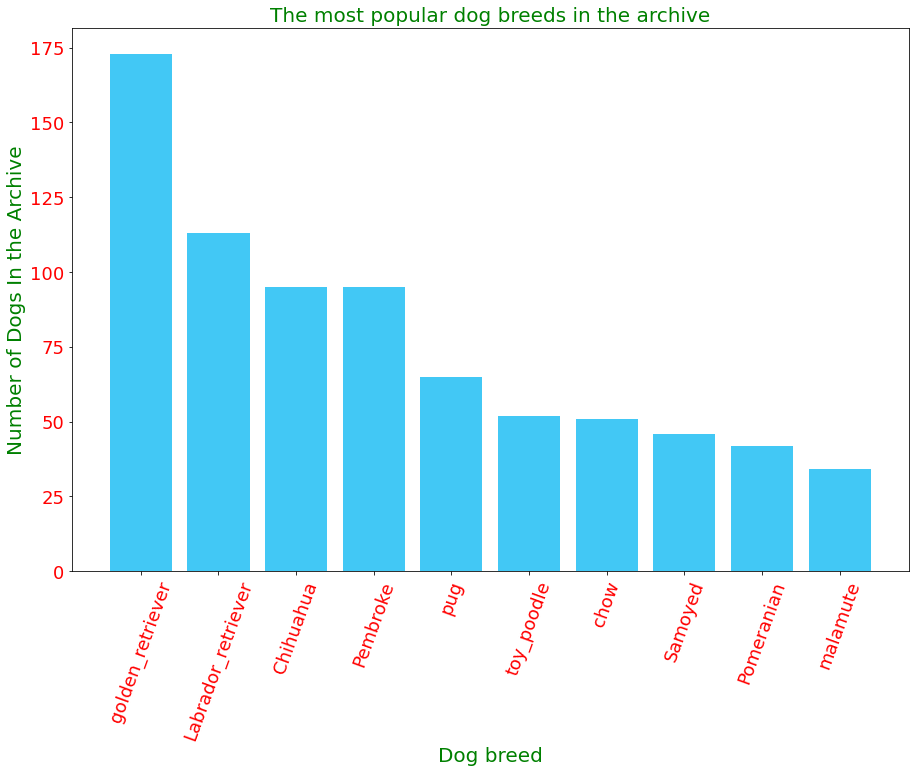

In [44]:
create_plot(x=most_popular_dogs.index,y=most_popular_dogs.values,
                plot_color='#42c8f5',
                xlab ="Dog breed", ylab = "Number of Dogs In the Archive", 
                lab_size=20,
                title="The most popular dog breeds in the archive",
                title_size =20,
                lab_and_title_color='green',
                xtick_rotation =70,
                tick_size=18,
                tick_color='red')


* what are the most favorites dog kinds ?

In [45]:
most_favorites_dogs = np.around(twitter_archive_master.groupby("dog_breed").mean()["favorite_count"].\
sort_values(ascending=False)[:10]/1000,2)
most_favorites_dogs

dog_breed
Saluki                     24.06
Bedlington_terrier         21.15
Bouvier_des_Flandres       18.03
French_bulldog             17.97
black-and-tan_coonhound    17.01
flat-coated_retriever      16.79
Irish_water_spaniel        16.40
Leonberg                   14.93
Afghan_hound               14.03
Mexican_hairless           13.59
Name: favorite_count, dtype: float64

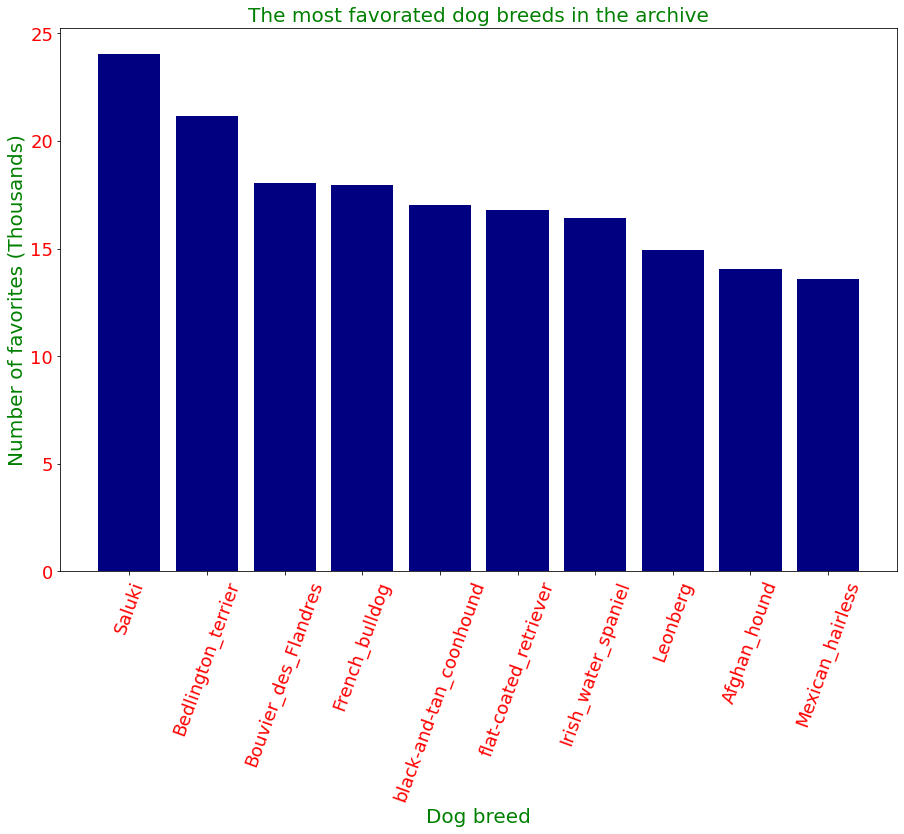

In [46]:
create_plot(x=most_favorites_dogs.index,y=most_favorites_dogs.values,
                plot_color='navy',
                xlab ="Dog breed", ylab = "Number of favorites (Thousands)", 
                lab_size=20,
                title="The most favorated dog breeds in the archive",
                title_size =20,
                lab_and_title_color='green',
                xtick_rotation =70,
                tick_size=18,
                tick_color='red')

* is there a correlation between favorites and rating_numerator ?

* is there a correlation between re-tweets and rating_numerator ?

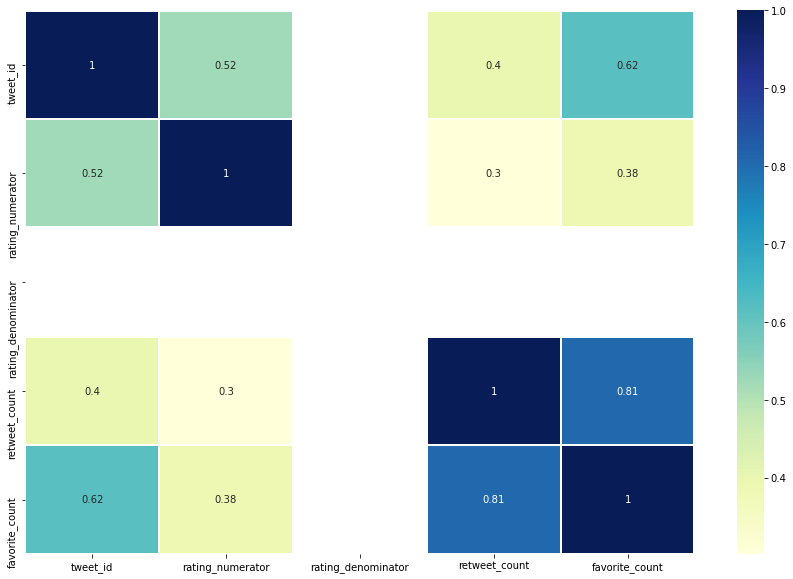

In [47]:
# numerical= df.select_dtypes([np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(twitter_archive_master.corr(), linewidth=1.5,annot=True,cmap="YlGnBu");


### seems that the only correlation here is between re-tweets and favorites count.

### Is there a different in favorites to dogs in different "stage" ?

In [48]:
dogs_stage = np.around(twitter_archive_master.groupby("stage")["favorite_count"]\
                       .mean().sort_values(ascending=False)/1000)
dogs_stage

stage
puppo      21.0
doggo      18.0
floofer    13.0
pupper      7.0
Name: favorite_count, dtype: float64

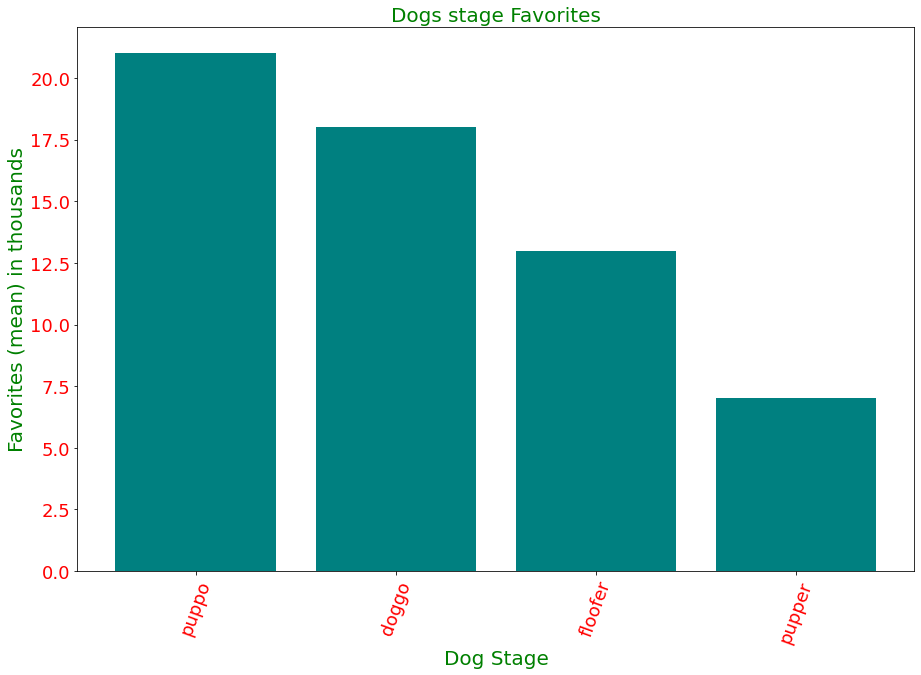

In [49]:
create_plot(x=dogs_stage.index,y=dogs_stage.values,
                plot_color='teal',
                xlab ="Dog Stage", ylab = "Favorites (mean) in thousands", 
                lab_size=20,
                title="Dogs stage Favorites",
                title_size =20,
                lab_and_title_color='green',
                xtick_rotation =70,
                tick_size=18,
                tick_color='red')

In [50]:
# how much dogs have staging ?
twitter_archive_master.groupby("stage").count()["tweet_id"].sum()

270

In [51]:
twitter_archive_master.shape

(1750, 8)

#### the precentage of dog which have staging:


In [52]:
np.round(270*100/1750)

15.0